In [33]:
import data
import models
import time
from tensorflow.keras.callbacks import CSVLogger, TerminateOnNaN

In [34]:
d = data.Data()

In [35]:
d.split_train_test(28)

In [36]:
d.standarize_data()

In [37]:
vocab_size, max_len, enc_names = d.encode_names()

In [38]:
train_x, train_y, test_x, test_y = d.retreive_data()

In [39]:
multi_train_y = d.make_multi_output_data(train_y)
multi_test_y = d.make_multi_output_data(test_y)

In [40]:
print("Data structure")
print(f"Number of countries: {len(d.countries)}")
# Check if all countries have the same data shape.
for c in d.countries:
    if c.data.shape != d.countries[0].data.shape:
        print(f"{c.name} has shape of {c.data.shape} instead of {d.countries[0].data.shape}")

Data structure
Number of countries: 188


In [41]:
print(f"Shape for country data: {d.countries[0].data.shape}")
print(f"train_x: {train_x.shape}\ntrain_y: {train_y.shape}\ntest_x: {test_x.shape}\ntest_y: {test_y.shape}")
print(f"Shape for multi train y: {multi_train_y.shape} and multi test y: {multi_test_y.shape}")
print(f"Vocab size: {vocab_size} and Max length: {max_len}")
print(f"Enc names: {enc_names.shape} and type: {type(enc_names)}")

Shape for country data: (243, 5)
train_x: (188, 187, 3)
train_y: (188, 28, 3)
test_x: (188, 187, 3)
test_y: (188, 28, 3)
Shape for multi train y: (3, 188, 28) and multi test y: (3, 188, 28)
Vocab size: 235.0 and Max length: 5
Enc names: (188, 5) and type: <class 'numpy.ndarray'>


In [42]:
temporal_shape = train_x[0].shape
word_shape = enc_names[0].shape
units = 100
output_size = 28

Create models.

In [43]:
multi_out_lstm = models.LSTMMultiOutput(temporal_shape, word_shape, units, output_size, activation='tanh')
multi_out_gru = models.GRUMultiOutput(temporal_shape, word_shape, units, output_size)

In [44]:
multi_out_lstm_V2 = models.LSTMMultiOutput_V2(temporal_shape, word_shape, units, output_size, activation='tanh')
multi_out_gru_V2 = models.GRUMultiOutput_V2(temporal_shape, word_shape, units, output_size)

In [45]:
single_out_lstm = models.LSTMSingleOutput(temporal_shape, word_shape, units, output_size, activation='tanh')
single_out_gru = models.GRUSingleOutput(temporal_shape, word_shape, units, output_size)

Print model architecture.

In [46]:
print(multi_out_lstm.summary())
print(multi_out_gru.summary())
print(multi_out_lstm_V2.summary())
print(multi_out_gru_V2.summary())
print(single_out_lstm.summary())
print(single_out_gru.summary())

Model: "LSTMMultiOutput"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
time_series_input (InputLayer)  [(None, 187, 3)]     0                                            
__________________________________________________________________________________________________
country_name_input (InputLayer) [(None, 5)]          0                                            
__________________________________________________________________________________________________
LSTM_encoder (LSTM)             (None, 100)          41600       time_series_input[0][0]          
__________________________________________________________________________________________________
country_name (Dense)            (None, 1)            6           country_name_input[0][0]         
____________________________________________________________________________________

Create logger callbacks.

In [47]:
multi_out_lstm_logger = CSVLogger('multi_out_lstm.csv', separator=',')
multi_out_gru_logger = CSVLogger('multi_out_gru.csv', separator=',')
multi_out_lstm_V2_logger = CSVLogger('multi_out_lstm_V2.csv', separator=',')
multi_out_gru_V2_logger = CSVLogger('multi_out_gru_V2.csv', separator=',')
single_out_lstm_logger = CSVLogger('single_out_lstm.csv', separator=',')
single_out_gru_logger = CSVLogger('single_out_gru.csv', separator=',')

In [48]:
ton_back = TerminateOnNaN()

In [49]:
epochs = 300
verbose=1

Train models.

In [50]:
multi_out_lstm_hist = multi_out_lstm.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                         epochs=epochs, verbose=verbose, callbacks=[multi_out_lstm_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 86ms/step - loss: 400.9347 - confirmed_loss: 139.1410 - deceased_loss: 136.8641 - recovered_loss: 124.9295 - confirmed_mean_squared_error: 139.1410 - confirmed_root_mean_squared_error: 11.7958 - deceased_mean_squared_error: 136.8641 - deceased_root_mean_squared_error: 11.6989 - recovered_mean_squared_error: 124.9295 - recovered_root_mean_squared_error: 11.1772
Epoch 2/300
6/6 [==============================] - 1s 86ms/step - loss: 343.6668 - confirmed_loss: 119.0081 - deceased_loss: 116.7057 - recovered_loss: 107.9529 - confirmed_mean_squared_error: 119.0081 - confirmed_root_mean_squared_error: 10.9091 - deceased_mean_squared_error: 116.7057 - deceased_root_mean_squared_error: 10.8030 - recovered_mean_squared_error: 107.9529 - recovered_root_mean_squared_error: 10.3900
Epoch 3/300
6/6 [==============================] - 0s 83ms/step - loss: 283.2685 - confirmed_loss: 97.6023 - deceased_loss: 95.8027 - recovered_loss: 89.8635 - confir

6/6 [==============================] - 0s 67ms/step - loss: 30.1842 - confirmed_loss: 11.5447 - deceased_loss: 9.4083 - recovered_loss: 9.2311 - confirmed_mean_squared_error: 11.5447 - confirmed_root_mean_squared_error: 3.3978 - deceased_mean_squared_error: 9.4083 - deceased_root_mean_squared_error: 3.0673 - recovered_mean_squared_error: 9.2311 - recovered_root_mean_squared_error: 3.0383
Epoch 22/300
6/6 [==============================] - 0s 68ms/step - loss: 28.9492 - confirmed_loss: 11.1075 - deceased_loss: 9.0038 - recovered_loss: 8.8379 - confirmed_mean_squared_error: 11.1075 - confirmed_root_mean_squared_error: 3.3328 - deceased_mean_squared_error: 9.0038 - deceased_root_mean_squared_error: 3.0006 - recovered_mean_squared_error: 8.8379 - recovered_root_mean_squared_error: 2.9729
Epoch 23/300
6/6 [==============================] - 0s 66ms/step - loss: 27.8245 - confirmed_loss: 10.6896 - deceased_loss: 8.6368 - recovered_loss: 8.4981 - confirmed_mean_squared_error: 10.6896 - confirm

6/6 [==============================] - 0s 83ms/step - loss: 13.6726 - confirmed_loss: 5.1075 - deceased_loss: 4.1145 - recovered_loss: 4.4507 - confirmed_mean_squared_error: 5.1075 - confirmed_root_mean_squared_error: 2.2600 - deceased_mean_squared_error: 4.1145 - deceased_root_mean_squared_error: 2.0284 - recovered_mean_squared_error: 4.4507 - recovered_root_mean_squared_error: 2.1097
Epoch 42/300
6/6 [==============================] - 0s 79ms/step - loss: 13.1266 - confirmed_loss: 4.8875 - deceased_loss: 3.9451 - recovered_loss: 4.2941 - confirmed_mean_squared_error: 4.8875 - confirmed_root_mean_squared_error: 2.2108 - deceased_mean_squared_error: 3.9451 - deceased_root_mean_squared_error: 1.9862 - recovered_mean_squared_error: 4.2941 - recovered_root_mean_squared_error: 2.0722
Epoch 43/300
6/6 [==============================] - 0s 75ms/step - loss: 12.6257 - confirmed_loss: 4.6855 - deceased_loss: 3.7906 - recovered_loss: 4.1496 - confirmed_mean_squared_error: 4.6855 - confirmed_roo

6/6 [==============================] - 1s 83ms/step - loss: 6.3100 - confirmed_loss: 2.1595 - deceased_loss: 1.8945 - recovered_loss: 2.2561 - confirmed_mean_squared_error: 2.1595 - confirmed_root_mean_squared_error: 1.4695 - deceased_mean_squared_error: 1.8945 - deceased_root_mean_squared_error: 1.3764 - recovered_mean_squared_error: 2.2561 - recovered_root_mean_squared_error: 1.5020
Epoch 61/300
6/6 [==============================] - 1s 84ms/step - loss: 6.0615 - confirmed_loss: 2.0615 - deceased_loss: 1.8225 - recovered_loss: 2.1776 - confirmed_mean_squared_error: 2.0615 - confirmed_root_mean_squared_error: 1.4358 - deceased_mean_squared_error: 1.8225 - deceased_root_mean_squared_error: 1.3500 - recovered_mean_squared_error: 2.1776 - recovered_root_mean_squared_error: 1.4757
Epoch 62/300
6/6 [==============================] - 1s 85ms/step - loss: 5.8169 - confirmed_loss: 1.9658 - deceased_loss: 1.7515 - recovered_loss: 2.0997 - confirmed_mean_squared_error: 1.9658 - confirmed_root_m

6/6 [==============================] - 0s 76ms/step - loss: 2.8371 - confirmed_loss: 0.8398 - deceased_loss: 0.9013 - recovered_loss: 1.0960 - confirmed_mean_squared_error: 0.8398 - confirmed_root_mean_squared_error: 0.9164 - deceased_mean_squared_error: 0.9013 - deceased_root_mean_squared_error: 0.9494 - recovered_mean_squared_error: 1.0960 - recovered_root_mean_squared_error: 1.0469
Epoch 81/300
6/6 [==============================] - 0s 75ms/step - loss: 2.7267 - confirmed_loss: 0.8002 - deceased_loss: 0.8701 - recovered_loss: 1.0564 - confirmed_mean_squared_error: 0.8002 - confirmed_root_mean_squared_error: 0.8946 - deceased_mean_squared_error: 0.8701 - deceased_root_mean_squared_error: 0.9328 - recovered_mean_squared_error: 1.0564 - recovered_root_mean_squared_error: 1.0278
Epoch 82/300
6/6 [==============================] - 0s 78ms/step - loss: 2.6242 - confirmed_loss: 0.7640 - deceased_loss: 0.8414 - recovered_loss: 1.0188 - confirmed_mean_squared_error: 0.7640 - confirmed_root_m

6/6 [==============================] - 0s 65ms/step - loss: 1.3718 - confirmed_loss: 0.3403 - deceased_loss: 0.4917 - recovered_loss: 0.5399 - confirmed_mean_squared_error: 0.3403 - confirmed_root_mean_squared_error: 0.5833 - deceased_mean_squared_error: 0.4917 - deceased_root_mean_squared_error: 0.7012 - recovered_mean_squared_error: 0.5399 - recovered_root_mean_squared_error: 0.7348
Epoch 101/300
6/6 [==============================] - 0s 70ms/step - loss: 1.3258 - confirmed_loss: 0.3261 - deceased_loss: 0.4782 - recovered_loss: 0.5214 - confirmed_mean_squared_error: 0.3261 - confirmed_root_mean_squared_error: 0.5711 - deceased_mean_squared_error: 0.4782 - deceased_root_mean_squared_error: 0.6915 - recovered_mean_squared_error: 0.5214 - recovered_root_mean_squared_error: 0.7221
Epoch 102/300
6/6 [==============================] - 0s 69ms/step - loss: 1.2841 - confirmed_loss: 0.3131 - deceased_loss: 0.4669 - recovered_loss: 0.5041 - confirmed_mean_squared_error: 0.3131 - confirmed_root

6/6 [==============================] - 0s 74ms/step - loss: 0.7827 - confirmed_loss: 0.1661 - deceased_loss: 0.3244 - recovered_loss: 0.2922 - confirmed_mean_squared_error: 0.1661 - confirmed_root_mean_squared_error: 0.4076 - deceased_mean_squared_error: 0.3244 - deceased_root_mean_squared_error: 0.5696 - recovered_mean_squared_error: 0.2922 - recovered_root_mean_squared_error: 0.5405
Epoch 121/300
6/6 [==============================] - 0s 69ms/step - loss: 0.7677 - confirmed_loss: 0.1620 - deceased_loss: 0.3206 - recovered_loss: 0.2852 - confirmed_mean_squared_error: 0.1620 - confirmed_root_mean_squared_error: 0.4025 - deceased_mean_squared_error: 0.3206 - deceased_root_mean_squared_error: 0.5662 - recovered_mean_squared_error: 0.2852 - recovered_root_mean_squared_error: 0.5340
Epoch 122/300
6/6 [==============================] - 0s 74ms/step - loss: 0.7504 - confirmed_loss: 0.1576 - deceased_loss: 0.3151 - recovered_loss: 0.2777 - confirmed_mean_squared_error: 0.1576 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 0.5680 - confirmed_loss: 0.1116 - deceased_loss: 0.2623 - recovered_loss: 0.1941 - confirmed_mean_squared_error: 0.1116 - confirmed_root_mean_squared_error: 0.3340 - deceased_mean_squared_error: 0.2623 - deceased_root_mean_squared_error: 0.5122 - recovered_mean_squared_error: 0.1941 - recovered_root_mean_squared_error: 0.4406
Epoch 141/300
6/6 [==============================] - 0s 64ms/step - loss: 0.5615 - confirmed_loss: 0.1106 - deceased_loss: 0.2597 - recovered_loss: 0.1911 - confirmed_mean_squared_error: 0.1106 - confirmed_root_mean_squared_error: 0.3326 - deceased_mean_squared_error: 0.2597 - deceased_root_mean_squared_error: 0.5096 - recovered_mean_squared_error: 0.1911 - recovered_root_mean_squared_error: 0.4372
Epoch 142/300
6/6 [==============================] - 0s 64ms/step - loss: 0.5556 - confirmed_loss: 0.1090 - deceased_loss: 0.2581 - recovered_loss: 0.1885 - confirmed_mean_squared_error: 0.1090 - confirmed_root

6/6 [==============================] - 0s 75ms/step - loss: 0.4933 - confirmed_loss: 0.0952 - deceased_loss: 0.2395 - recovered_loss: 0.1586 - confirmed_mean_squared_error: 0.0952 - confirmed_root_mean_squared_error: 0.3085 - deceased_mean_squared_error: 0.2395 - deceased_root_mean_squared_error: 0.4894 - recovered_mean_squared_error: 0.1586 - recovered_root_mean_squared_error: 0.3983
Epoch 161/300
6/6 [==============================] - 0s 74ms/step - loss: 0.4913 - confirmed_loss: 0.0947 - deceased_loss: 0.2392 - recovered_loss: 0.1574 - confirmed_mean_squared_error: 0.0947 - confirmed_root_mean_squared_error: 0.3078 - deceased_mean_squared_error: 0.2392 - deceased_root_mean_squared_error: 0.4891 - recovered_mean_squared_error: 0.1574 - recovered_root_mean_squared_error: 0.3967
Epoch 162/300
6/6 [==============================] - 0s 74ms/step - loss: 0.4890 - confirmed_loss: 0.0945 - deceased_loss: 0.2380 - recovered_loss: 0.1565 - confirmed_mean_squared_error: 0.0945 - confirmed_root

6/6 [==============================] - 0s 77ms/step - loss: 0.4663 - confirmed_loss: 0.0903 - deceased_loss: 0.2299 - recovered_loss: 0.1461 - confirmed_mean_squared_error: 0.0903 - confirmed_root_mean_squared_error: 0.3005 - deceased_mean_squared_error: 0.2299 - deceased_root_mean_squared_error: 0.4794 - recovered_mean_squared_error: 0.1461 - recovered_root_mean_squared_error: 0.3822
Epoch 181/300
6/6 [==============================] - 0s 74ms/step - loss: 0.4650 - confirmed_loss: 0.0900 - deceased_loss: 0.2295 - recovered_loss: 0.1455 - confirmed_mean_squared_error: 0.0900 - confirmed_root_mean_squared_error: 0.2999 - deceased_mean_squared_error: 0.2295 - deceased_root_mean_squared_error: 0.4791 - recovered_mean_squared_error: 0.1455 - recovered_root_mean_squared_error: 0.3815
Epoch 182/300
6/6 [==============================] - 0s 67ms/step - loss: 0.4651 - confirmed_loss: 0.0897 - deceased_loss: 0.2302 - recovered_loss: 0.1452 - confirmed_mean_squared_error: 0.0897 - confirmed_root

6/6 [==============================] - 0s 62ms/step - loss: 0.4558 - confirmed_loss: 0.0887 - deceased_loss: 0.2252 - recovered_loss: 0.1419 - confirmed_mean_squared_error: 0.0887 - confirmed_root_mean_squared_error: 0.2978 - deceased_mean_squared_error: 0.2252 - deceased_root_mean_squared_error: 0.4745 - recovered_mean_squared_error: 0.1419 - recovered_root_mean_squared_error: 0.3766
Epoch 201/300
6/6 [==============================] - 0s 63ms/step - loss: 0.4552 - confirmed_loss: 0.0887 - deceased_loss: 0.2247 - recovered_loss: 0.1418 - confirmed_mean_squared_error: 0.0887 - confirmed_root_mean_squared_error: 0.2978 - deceased_mean_squared_error: 0.2247 - deceased_root_mean_squared_error: 0.4740 - recovered_mean_squared_error: 0.1418 - recovered_root_mean_squared_error: 0.3765
Epoch 202/300
6/6 [==============================] - 0s 63ms/step - loss: 0.4546 - confirmed_loss: 0.0884 - deceased_loss: 0.2246 - recovered_loss: 0.1416 - confirmed_mean_squared_error: 0.0884 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 0.4485 - confirmed_loss: 0.0879 - deceased_loss: 0.2207 - recovered_loss: 0.1398 - confirmed_mean_squared_error: 0.0879 - confirmed_root_mean_squared_error: 0.2965 - deceased_mean_squared_error: 0.2207 - deceased_root_mean_squared_error: 0.4698 - recovered_mean_squared_error: 0.1398 - recovered_root_mean_squared_error: 0.3739
Epoch 221/300
6/6 [==============================] - 0s 68ms/step - loss: 0.4487 - confirmed_loss: 0.0882 - deceased_loss: 0.2208 - recovered_loss: 0.1397 - confirmed_mean_squared_error: 0.0882 - confirmed_root_mean_squared_error: 0.2969 - deceased_mean_squared_error: 0.2208 - deceased_root_mean_squared_error: 0.4699 - recovered_mean_squared_error: 0.1397 - recovered_root_mean_squared_error: 0.3738
Epoch 222/300
6/6 [==============================] - 0s 76ms/step - loss: 0.4483 - confirmed_loss: 0.0880 - deceased_loss: 0.2208 - recovered_loss: 0.1395 - confirmed_mean_squared_error: 0.0880 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 0.4420 - confirmed_loss: 0.0882 - deceased_loss: 0.2143 - recovered_loss: 0.1395 - confirmed_mean_squared_error: 0.0882 - confirmed_root_mean_squared_error: 0.2970 - deceased_mean_squared_error: 0.2143 - deceased_root_mean_squared_error: 0.4629 - recovered_mean_squared_error: 0.1395 - recovered_root_mean_squared_error: 0.3736
Epoch 241/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4419 - confirmed_loss: 0.0882 - deceased_loss: 0.2147 - recovered_loss: 0.1389 - confirmed_mean_squared_error: 0.0882 - confirmed_root_mean_squared_error: 0.2970 - deceased_mean_squared_error: 0.2147 - deceased_root_mean_squared_error: 0.4634 - recovered_mean_squared_error: 0.1389 - recovered_root_mean_squared_error: 0.3728
Epoch 242/300
6/6 [==============================] - 0s 72ms/step - loss: 0.4406 - confirmed_loss: 0.0880 - deceased_loss: 0.2143 - recovered_loss: 0.1383 - confirmed_mean_squared_error: 0.0880 - confirmed_root

6/6 [==============================] - 0s 63ms/step - loss: 0.4401 - confirmed_loss: 0.0895 - deceased_loss: 0.2122 - recovered_loss: 0.1384 - confirmed_mean_squared_error: 0.0895 - confirmed_root_mean_squared_error: 0.2991 - deceased_mean_squared_error: 0.2122 - deceased_root_mean_squared_error: 0.4607 - recovered_mean_squared_error: 0.1384 - recovered_root_mean_squared_error: 0.3720
Epoch 261/300
6/6 [==============================] - 0s 64ms/step - loss: 0.4381 - confirmed_loss: 0.0871 - deceased_loss: 0.2130 - recovered_loss: 0.1381 - confirmed_mean_squared_error: 0.0871 - confirmed_root_mean_squared_error: 0.2951 - deceased_mean_squared_error: 0.2130 - deceased_root_mean_squared_error: 0.4615 - recovered_mean_squared_error: 0.1381 - recovered_root_mean_squared_error: 0.3716
Epoch 262/300
6/6 [==============================] - 0s 63ms/step - loss: 0.4361 - confirmed_loss: 0.0878 - deceased_loss: 0.2109 - recovered_loss: 0.1375 - confirmed_mean_squared_error: 0.0878 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 0.4272 - confirmed_loss: 0.0864 - deceased_loss: 0.2016 - recovered_loss: 0.1392 - confirmed_mean_squared_error: 0.0864 - confirmed_root_mean_squared_error: 0.2939 - deceased_mean_squared_error: 0.2016 - deceased_root_mean_squared_error: 0.4490 - recovered_mean_squared_error: 0.1392 - recovered_root_mean_squared_error: 0.3731
Epoch 281/300
6/6 [==============================] - 0s 66ms/step - loss: 0.4258 - confirmed_loss: 0.0864 - deceased_loss: 0.2011 - recovered_loss: 0.1383 - confirmed_mean_squared_error: 0.0864 - confirmed_root_mean_squared_error: 0.2939 - deceased_mean_squared_error: 0.2011 - deceased_root_mean_squared_error: 0.4485 - recovered_mean_squared_error: 0.1383 - recovered_root_mean_squared_error: 0.3719
Epoch 282/300
6/6 [==============================] - 0s 65ms/step - loss: 0.4266 - confirmed_loss: 0.0874 - deceased_loss: 0.2004 - recovered_loss: 0.1388 - confirmed_mean_squared_error: 0.0874 - confirmed_root

6/6 [==============================] - 0s 64ms/step - loss: 0.4197 - confirmed_loss: 0.0863 - deceased_loss: 0.1944 - recovered_loss: 0.1390 - confirmed_mean_squared_error: 0.0863 - confirmed_root_mean_squared_error: 0.2938 - deceased_mean_squared_error: 0.1944 - deceased_root_mean_squared_error: 0.4409 - recovered_mean_squared_error: 0.1390 - recovered_root_mean_squared_error: 0.3728


In [51]:
multi_out_gru_hist = multi_out_gru.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                       epochs=epochs, verbose=verbose, callbacks=[multi_out_gru_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 74ms/step - loss: 749.8646 - confirmed_loss: 191.4434 - deceased_loss: 247.1413 - recovered_loss: 311.2800 - confirmed_mean_squared_error: 191.4434 - confirmed_root_mean_squared_error: 13.8363 - deceased_mean_squared_error: 247.1413 - deceased_root_mean_squared_error: 15.7207 - recovered_mean_squared_error: 311.2800 - recovered_root_mean_squared_error: 17.6431
Epoch 2/300
6/6 [==============================] - 0s 75ms/step - loss: 666.2580 - confirmed_loss: 167.7360 - deceased_loss: 219.6938 - recovered_loss: 278.8281 - confirmed_mean_squared_error: 167.7360 - confirmed_root_mean_squared_error: 12.9513 - deceased_mean_squared_error: 219.6938 - deceased_root_mean_squared_error: 14.8221 - recovered_mean_squared_error: 278.8281 - recovered_root_mean_squared_error: 16.6981
Epoch 3/300
6/6 [==============================] - 0s 69ms/step - loss: 590.7644 - confirmed_loss: 146.5595 - deceased_loss: 195.1034 - recovered_loss: 249.1015 - con

6/6 [==============================] - 0s 69ms/step - loss: 66.2933 - confirmed_loss: 15.4432 - deceased_loss: 20.6036 - recovered_loss: 30.2465 - confirmed_mean_squared_error: 15.4432 - confirmed_root_mean_squared_error: 3.9298 - deceased_mean_squared_error: 20.6036 - deceased_root_mean_squared_error: 4.5391 - recovered_mean_squared_error: 30.2465 - recovered_root_mean_squared_error: 5.4997
Epoch 21/300
6/6 [==============================] - 0s 68ms/step - loss: 64.2100 - confirmed_loss: 14.9130 - deceased_loss: 19.9392 - recovered_loss: 29.3578 - confirmed_mean_squared_error: 14.9130 - confirmed_root_mean_squared_error: 3.8617 - deceased_mean_squared_error: 19.9392 - deceased_root_mean_squared_error: 4.4653 - recovered_mean_squared_error: 29.3578 - recovered_root_mean_squared_error: 5.4183
Epoch 22/300
6/6 [==============================] - 0s 71ms/step - loss: 60.2375 - confirmed_loss: 13.9106 - deceased_loss: 18.6498 - recovered_loss: 27.6771 - confirmed_mean_squared_error: 13.9106

6/6 [==============================] - 0s 67ms/step - loss: 24.5472 - confirmed_loss: 5.3190 - deceased_loss: 7.2917 - recovered_loss: 11.9364 - confirmed_mean_squared_error: 5.3190 - confirmed_root_mean_squared_error: 2.3063 - deceased_mean_squared_error: 7.2917 - deceased_root_mean_squared_error: 2.7003 - recovered_mean_squared_error: 11.9364 - recovered_root_mean_squared_error: 3.4549
Epoch 41/300
6/6 [==============================] - 0s 68ms/step - loss: 23.6148 - confirmed_loss: 5.1076 - deceased_loss: 7.0073 - recovered_loss: 11.4999 - confirmed_mean_squared_error: 5.1076 - confirmed_root_mean_squared_error: 2.2600 - deceased_mean_squared_error: 7.0073 - deceased_root_mean_squared_error: 2.6471 - recovered_mean_squared_error: 11.4999 - recovered_root_mean_squared_error: 3.3911
Epoch 42/300
6/6 [==============================] - 0s 67ms/step - loss: 22.7495 - confirmed_loss: 4.8937 - deceased_loss: 6.7248 - recovered_loss: 11.1310 - confirmed_mean_squared_error: 4.8937 - confirme

6/6 [==============================] - 0s 68ms/step - loss: 9.6792 - confirmed_loss: 2.0304 - deceased_loss: 2.7789 - recovered_loss: 4.8699 - confirmed_mean_squared_error: 2.0304 - confirmed_root_mean_squared_error: 1.4249 - deceased_mean_squared_error: 2.7789 - deceased_root_mean_squared_error: 1.6670 - recovered_mean_squared_error: 4.8699 - recovered_root_mean_squared_error: 2.2068
Epoch 61/300
6/6 [==============================] - 0s 67ms/step - loss: 9.3488 - confirmed_loss: 1.9539 - deceased_loss: 2.6785 - recovered_loss: 4.7164 - confirmed_mean_squared_error: 1.9539 - confirmed_root_mean_squared_error: 1.3978 - deceased_mean_squared_error: 2.6785 - deceased_root_mean_squared_error: 1.6366 - recovered_mean_squared_error: 4.7164 - recovered_root_mean_squared_error: 2.1717
Epoch 62/300
6/6 [==============================] - 0s 67ms/step - loss: 8.7285 - confirmed_loss: 1.8252 - deceased_loss: 2.4929 - recovered_loss: 4.4103 - confirmed_mean_squared_error: 1.8252 - confirmed_root_m

6/6 [==============================] - 0s 68ms/step - loss: 3.9531 - confirmed_loss: 0.8316 - deceased_loss: 1.1418 - recovered_loss: 1.9798 - confirmed_mean_squared_error: 0.8316 - confirmed_root_mean_squared_error: 0.9119 - deceased_mean_squared_error: 1.1418 - deceased_root_mean_squared_error: 1.0685 - recovered_mean_squared_error: 1.9798 - recovered_root_mean_squared_error: 1.4070
Epoch 81/300
6/6 [==============================] - 0s 67ms/step - loss: 3.8187 - confirmed_loss: 0.8032 - deceased_loss: 1.1028 - recovered_loss: 1.9126 - confirmed_mean_squared_error: 0.8032 - confirmed_root_mean_squared_error: 0.8962 - deceased_mean_squared_error: 1.1028 - deceased_root_mean_squared_error: 1.0502 - recovered_mean_squared_error: 1.9126 - recovered_root_mean_squared_error: 1.3830
Epoch 82/300
6/6 [==============================] - 0s 68ms/step - loss: 3.6423 - confirmed_loss: 0.7673 - deceased_loss: 1.0539 - recovered_loss: 1.8212 - confirmed_mean_squared_error: 0.7673 - confirmed_root_m

6/6 [==============================] - 0s 68ms/step - loss: 1.8372 - confirmed_loss: 0.3950 - deceased_loss: 0.5655 - recovered_loss: 0.8766 - confirmed_mean_squared_error: 0.3950 - confirmed_root_mean_squared_error: 0.6285 - deceased_mean_squared_error: 0.5655 - deceased_root_mean_squared_error: 0.7520 - recovered_mean_squared_error: 0.8766 - recovered_root_mean_squared_error: 0.9363
Epoch 101/300
6/6 [==============================] - 0s 68ms/step - loss: 1.7749 - confirmed_loss: 0.3825 - deceased_loss: 0.5485 - recovered_loss: 0.8438 - confirmed_mean_squared_error: 0.3825 - confirmed_root_mean_squared_error: 0.6185 - deceased_mean_squared_error: 0.5485 - deceased_root_mean_squared_error: 0.7406 - recovered_mean_squared_error: 0.8438 - recovered_root_mean_squared_error: 0.9186
Epoch 102/300
6/6 [==============================] - 0s 70ms/step - loss: 1.7153 - confirmed_loss: 0.3703 - deceased_loss: 0.5322 - recovered_loss: 0.8127 - confirmed_mean_squared_error: 0.3703 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.9878 - confirmed_loss: 0.2211 - deceased_loss: 0.3337 - recovered_loss: 0.4330 - confirmed_mean_squared_error: 0.2211 - confirmed_root_mean_squared_error: 0.4702 - deceased_mean_squared_error: 0.3337 - deceased_root_mean_squared_error: 0.5777 - recovered_mean_squared_error: 0.4330 - recovered_root_mean_squared_error: 0.6580
Epoch 121/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9601 - confirmed_loss: 0.2154 - deceased_loss: 0.3257 - recovered_loss: 0.4189 - confirmed_mean_squared_error: 0.2154 - confirmed_root_mean_squared_error: 0.4642 - deceased_mean_squared_error: 0.3257 - deceased_root_mean_squared_error: 0.5707 - recovered_mean_squared_error: 0.4189 - recovered_root_mean_squared_error: 0.6472
Epoch 122/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9331 - confirmed_loss: 0.2095 - deceased_loss: 0.3183 - recovered_loss: 0.4053 - confirmed_mean_squared_error: 0.2095 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.5550 - confirmed_loss: 0.1105 - deceased_loss: 0.2251 - recovered_loss: 0.2195 - confirmed_mean_squared_error: 0.1105 - confirmed_root_mean_squared_error: 0.3324 - deceased_mean_squared_error: 0.2251 - deceased_root_mean_squared_error: 0.4744 - recovered_mean_squared_error: 0.2195 - recovered_root_mean_squared_error: 0.4685
Epoch 141/300
6/6 [==============================] - 0s 68ms/step - loss: 0.5447 - confirmed_loss: 0.1078 - deceased_loss: 0.2232 - recovered_loss: 0.2138 - confirmed_mean_squared_error: 0.1078 - confirmed_root_mean_squared_error: 0.3283 - deceased_mean_squared_error: 0.2232 - deceased_root_mean_squared_error: 0.4724 - recovered_mean_squared_error: 0.2138 - recovered_root_mean_squared_error: 0.4623
Epoch 142/300
6/6 [==============================] - 0s 67ms/step - loss: 0.5345 - confirmed_loss: 0.1051 - deceased_loss: 0.2212 - recovered_loss: 0.2081 - confirmed_mean_squared_error: 0.1051 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.4375 - confirmed_loss: 0.0837 - deceased_loss: 0.1995 - recovered_loss: 0.1544 - confirmed_mean_squared_error: 0.0837 - confirmed_root_mean_squared_error: 0.2892 - deceased_mean_squared_error: 0.1995 - deceased_root_mean_squared_error: 0.4466 - recovered_mean_squared_error: 0.1544 - recovered_root_mean_squared_error: 0.3929
Epoch 161/300
6/6 [==============================] - 0s 68ms/step - loss: 0.4349 - confirmed_loss: 0.0832 - deceased_loss: 0.1986 - recovered_loss: 0.1531 - confirmed_mean_squared_error: 0.0832 - confirmed_root_mean_squared_error: 0.2885 - deceased_mean_squared_error: 0.1986 - deceased_root_mean_squared_error: 0.4457 - recovered_mean_squared_error: 0.1531 - recovered_root_mean_squared_error: 0.3913
Epoch 162/300
6/6 [==============================] - 0s 67ms/step - loss: 0.4326 - confirmed_loss: 0.0825 - deceased_loss: 0.1982 - recovered_loss: 0.1519 - confirmed_mean_squared_error: 0.0825 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.4010 - confirmed_loss: 0.0772 - deceased_loss: 0.1878 - recovered_loss: 0.1359 - confirmed_mean_squared_error: 0.0772 - confirmed_root_mean_squared_error: 0.2779 - deceased_mean_squared_error: 0.1878 - deceased_root_mean_squared_error: 0.4334 - recovered_mean_squared_error: 0.1359 - recovered_root_mean_squared_error: 0.3687
Epoch 181/300
6/6 [==============================] - 0s 68ms/step - loss: 0.4022 - confirmed_loss: 0.0773 - deceased_loss: 0.1881 - recovered_loss: 0.1368 - confirmed_mean_squared_error: 0.0773 - confirmed_root_mean_squared_error: 0.2781 - deceased_mean_squared_error: 0.1881 - deceased_root_mean_squared_error: 0.4337 - recovered_mean_squared_error: 0.1368 - recovered_root_mean_squared_error: 0.3699
Epoch 182/300
6/6 [==============================] - 0s 68ms/step - loss: 0.4022 - confirmed_loss: 0.0779 - deceased_loss: 0.1881 - recovered_loss: 0.1361 - confirmed_mean_squared_error: 0.0779 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 0.3866 - confirmed_loss: 0.0750 - deceased_loss: 0.1808 - recovered_loss: 0.1308 - confirmed_mean_squared_error: 0.0750 - confirmed_root_mean_squared_error: 0.2738 - deceased_mean_squared_error: 0.1808 - deceased_root_mean_squared_error: 0.4253 - recovered_mean_squared_error: 0.1308 - recovered_root_mean_squared_error: 0.3617
Epoch 201/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3848 - confirmed_loss: 0.0752 - deceased_loss: 0.1794 - recovered_loss: 0.1302 - confirmed_mean_squared_error: 0.0752 - confirmed_root_mean_squared_error: 0.2743 - deceased_mean_squared_error: 0.1794 - deceased_root_mean_squared_error: 0.4235 - recovered_mean_squared_error: 0.1302 - recovered_root_mean_squared_error: 0.3608
Epoch 202/300
6/6 [==============================] - 0s 67ms/step - loss: 0.3852 - confirmed_loss: 0.0749 - deceased_loss: 0.1801 - recovered_loss: 0.1303 - confirmed_mean_squared_error: 0.0749 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.3755 - confirmed_loss: 0.0742 - deceased_loss: 0.1732 - recovered_loss: 0.1280 - confirmed_mean_squared_error: 0.0742 - confirmed_root_mean_squared_error: 0.2723 - deceased_mean_squared_error: 0.1732 - deceased_root_mean_squared_error: 0.4162 - recovered_mean_squared_error: 0.1280 - recovered_root_mean_squared_error: 0.3578
Epoch 221/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3757 - confirmed_loss: 0.0728 - deceased_loss: 0.1744 - recovered_loss: 0.1285 - confirmed_mean_squared_error: 0.0728 - confirmed_root_mean_squared_error: 0.2698 - deceased_mean_squared_error: 0.1744 - deceased_root_mean_squared_error: 0.4176 - recovered_mean_squared_error: 0.1285 - recovered_root_mean_squared_error: 0.3584
Epoch 222/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3738 - confirmed_loss: 0.0730 - deceased_loss: 0.1729 - recovered_loss: 0.1279 - confirmed_mean_squared_error: 0.0730 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.3703 - confirmed_loss: 0.0730 - deceased_loss: 0.1710 - recovered_loss: 0.1263 - confirmed_mean_squared_error: 0.0730 - confirmed_root_mean_squared_error: 0.2701 - deceased_mean_squared_error: 0.1710 - deceased_root_mean_squared_error: 0.4136 - recovered_mean_squared_error: 0.1263 - recovered_root_mean_squared_error: 0.3554
Epoch 241/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3701 - confirmed_loss: 0.0733 - deceased_loss: 0.1706 - recovered_loss: 0.1262 - confirmed_mean_squared_error: 0.0733 - confirmed_root_mean_squared_error: 0.2708 - deceased_mean_squared_error: 0.1706 - deceased_root_mean_squared_error: 0.4130 - recovered_mean_squared_error: 0.1262 - recovered_root_mean_squared_error: 0.3553
Epoch 242/300
6/6 [==============================] - 0s 67ms/step - loss: 0.3690 - confirmed_loss: 0.0730 - deceased_loss: 0.1702 - recovered_loss: 0.1257 - confirmed_mean_squared_error: 0.0730 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.3654 - confirmed_loss: 0.0722 - deceased_loss: 0.1681 - recovered_loss: 0.1251 - confirmed_mean_squared_error: 0.0722 - confirmed_root_mean_squared_error: 0.2687 - deceased_mean_squared_error: 0.1681 - deceased_root_mean_squared_error: 0.4100 - recovered_mean_squared_error: 0.1251 - recovered_root_mean_squared_error: 0.3537
Epoch 261/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3645 - confirmed_loss: 0.0721 - deceased_loss: 0.1680 - recovered_loss: 0.1244 - confirmed_mean_squared_error: 0.0721 - confirmed_root_mean_squared_error: 0.2686 - deceased_mean_squared_error: 0.1680 - deceased_root_mean_squared_error: 0.4099 - recovered_mean_squared_error: 0.1244 - recovered_root_mean_squared_error: 0.3527
Epoch 262/300
6/6 [==============================] - 0s 67ms/step - loss: 0.3642 - confirmed_loss: 0.0719 - deceased_loss: 0.1679 - recovered_loss: 0.1244 - confirmed_mean_squared_error: 0.0719 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.3579 - confirmed_loss: 0.0698 - deceased_loss: 0.1653 - recovered_loss: 0.1228 - confirmed_mean_squared_error: 0.0698 - confirmed_root_mean_squared_error: 0.2641 - deceased_mean_squared_error: 0.1653 - deceased_root_mean_squared_error: 0.4066 - recovered_mean_squared_error: 0.1228 - recovered_root_mean_squared_error: 0.3505
Epoch 281/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3585 - confirmed_loss: 0.0704 - deceased_loss: 0.1661 - recovered_loss: 0.1220 - confirmed_mean_squared_error: 0.0704 - confirmed_root_mean_squared_error: 0.2654 - deceased_mean_squared_error: 0.1661 - deceased_root_mean_squared_error: 0.4076 - recovered_mean_squared_error: 0.1220 - recovered_root_mean_squared_error: 0.3492
Epoch 282/300
6/6 [==============================] - 0s 68ms/step - loss: 0.3594 - confirmed_loss: 0.0711 - deceased_loss: 0.1661 - recovered_loss: 0.1222 - confirmed_mean_squared_error: 0.0711 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 0.3551 - confirmed_loss: 0.0697 - deceased_loss: 0.1633 - recovered_loss: 0.1221 - confirmed_mean_squared_error: 0.0697 - confirmed_root_mean_squared_error: 0.2641 - deceased_mean_squared_error: 0.1633 - deceased_root_mean_squared_error: 0.4041 - recovered_mean_squared_error: 0.1221 - recovered_root_mean_squared_error: 0.3495


In [52]:
multi_out_lstm_V2_hist = multi_out_lstm_V2.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                               epochs=epochs, verbose=verbose, callbacks=[multi_out_lstm_V2_logger,
                                                                                          ton_back])

Epoch 1/300
6/6 [==============================] - 0s 69ms/step - loss: 560.3614 - confirmed_loss: 282.6801 - deceased_loss: 6.4661 - recovered_loss: 271.2152 - confirmed_mean_squared_error: 282.6801 - confirmed_root_mean_squared_error: 16.8131 - deceased_mean_squared_error: 6.4661 - deceased_root_mean_squared_error: 2.5428 - recovered_mean_squared_error: 271.2152 - recovered_root_mean_squared_error: 16.4686
Epoch 2/300
6/6 [==============================] - 0s 68ms/step - loss: 441.8664 - confirmed_loss: 228.2505 - deceased_loss: 3.1298 - recovered_loss: 210.4861 - confirmed_mean_squared_error: 228.2505 - confirmed_root_mean_squared_error: 15.1080 - deceased_mean_squared_error: 3.1298 - deceased_root_mean_squared_error: 1.7691 - recovered_mean_squared_error: 210.4861 - recovered_root_mean_squared_error: 14.5081
Epoch 3/300
6/6 [==============================] - 0s 67ms/step - loss: 343.5438 - confirmed_loss: 179.5679 - deceased_loss: 1.9800 - recovered_loss: 161.9959 - confirmed_mean_

6/6 [==============================] - 0s 76ms/step - loss: 94.6904 - confirmed_loss: 47.7439 - deceased_loss: 0.8197 - recovered_loss: 46.1268 - confirmed_mean_squared_error: 47.7439 - confirmed_root_mean_squared_error: 6.9097 - deceased_mean_squared_error: 0.8197 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 46.1268 - recovered_root_mean_squared_error: 6.7917
Epoch 22/300
6/6 [==============================] - 0s 78ms/step - loss: 90.9772 - confirmed_loss: 45.8855 - deceased_loss: 0.8197 - recovered_loss: 44.2720 - confirmed_mean_squared_error: 45.8855 - confirmed_root_mean_squared_error: 6.7739 - deceased_mean_squared_error: 0.8197 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 44.2720 - recovered_root_mean_squared_error: 6.6537
Epoch 23/300
6/6 [==============================] - 0s 78ms/step - loss: 86.5449 - confirmed_loss: 43.6657 - deceased_loss: 0.8197 - recovered_loss: 42.0595 - confirmed_mean_squared_error: 43.6657 - co

6/6 [==============================] - 0s 67ms/step - loss: 37.9923 - confirmed_loss: 19.1862 - deceased_loss: 0.8194 - recovered_loss: 17.9867 - confirmed_mean_squared_error: 19.1862 - confirmed_root_mean_squared_error: 4.3802 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 17.9867 - recovered_root_mean_squared_error: 4.2411
Epoch 42/300
6/6 [==============================] - 0s 66ms/step - loss: 36.2441 - confirmed_loss: 18.2971 - deceased_loss: 0.8194 - recovered_loss: 17.1276 - confirmed_mean_squared_error: 18.2971 - confirmed_root_mean_squared_error: 4.2775 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 17.1276 - recovered_root_mean_squared_error: 4.1386
Epoch 43/300
6/6 [==============================] - 0s 66ms/step - loss: 34.6706 - confirmed_loss: 17.4971 - deceased_loss: 0.8194 - recovered_loss: 16.3541 - confirmed_mean_squared_error: 17.4971 - co

6/6 [==============================] - 0s 67ms/step - loss: 15.5141 - confirmed_loss: 7.6841 - deceased_loss: 0.8192 - recovered_loss: 7.0108 - confirmed_mean_squared_error: 7.6841 - confirmed_root_mean_squared_error: 2.7720 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 7.0108 - recovered_root_mean_squared_error: 2.6478
Epoch 62/300
6/6 [==============================] - 0s 67ms/step - loss: 14.8439 - confirmed_loss: 7.3378 - deceased_loss: 0.8192 - recovered_loss: 6.6869 - confirmed_mean_squared_error: 7.3378 - confirmed_root_mean_squared_error: 2.7088 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 6.6869 - recovered_root_mean_squared_error: 2.5859
Epoch 63/300
6/6 [==============================] - 0s 66ms/step - loss: 14.2635 - confirmed_loss: 7.0376 - deceased_loss: 0.8192 - recovered_loss: 6.4068 - confirmed_mean_squared_error: 7.0376 - confirmed_roo

6/6 [==============================] - 0s 67ms/step - loss: 6.9589 - confirmed_loss: 3.2318 - deceased_loss: 0.8192 - recovered_loss: 2.9079 - confirmed_mean_squared_error: 3.2318 - confirmed_root_mean_squared_error: 1.7977 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 2.9079 - recovered_root_mean_squared_error: 1.7053
Epoch 82/300
6/6 [==============================] - 0s 67ms/step - loss: 6.7266 - confirmed_loss: 3.1094 - deceased_loss: 0.8192 - recovered_loss: 2.7979 - confirmed_mean_squared_error: 3.1094 - confirmed_root_mean_squared_error: 1.7634 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 2.7979 - recovered_root_mean_squared_error: 1.6727
Epoch 83/300
6/6 [==============================] - 0s 66ms/step - loss: 6.4767 - confirmed_loss: 2.9777 - deceased_loss: 0.8192 - recovered_loss: 2.6797 - confirmed_mean_squared_error: 2.9777 - confirmed_root_m

6/6 [==============================] - 0s 66ms/step - loss: 3.9679 - confirmed_loss: 1.6442 - deceased_loss: 0.8193 - recovered_loss: 1.5044 - confirmed_mean_squared_error: 1.6442 - confirmed_root_mean_squared_error: 1.2823 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 1.5044 - recovered_root_mean_squared_error: 1.2265
Epoch 102/300
6/6 [==============================] - 0s 66ms/step - loss: 3.8868 - confirmed_loss: 1.6006 - deceased_loss: 0.8193 - recovered_loss: 1.4670 - confirmed_mean_squared_error: 1.6006 - confirmed_root_mean_squared_error: 1.2651 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 1.4670 - recovered_root_mean_squared_error: 1.2112
Epoch 103/300
6/6 [==============================] - 0s 65ms/step - loss: 3.8115 - confirmed_loss: 1.5601 - deceased_loss: 0.8193 - recovered_loss: 1.4322 - confirmed_mean_squared_error: 1.5601 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 3.0412 - confirmed_loss: 1.1417 - deceased_loss: 0.8192 - recovered_loss: 1.0803 - confirmed_mean_squared_error: 1.1417 - confirmed_root_mean_squared_error: 1.0685 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 1.0803 - recovered_root_mean_squared_error: 1.0394
Epoch 122/300
6/6 [==============================] - 0s 65ms/step - loss: 3.0214 - confirmed_loss: 1.1308 - deceased_loss: 0.8192 - recovered_loss: 1.0713 - confirmed_mean_squared_error: 1.1308 - confirmed_root_mean_squared_error: 1.0634 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 1.0713 - recovered_root_mean_squared_error: 1.0351
Epoch 123/300
6/6 [==============================] - 0s 65ms/step - loss: 3.0000 - confirmed_loss: 1.1190 - deceased_loss: 0.8192 - recovered_loss: 1.0617 - confirmed_mean_squared_error: 1.1190 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7977 - confirmed_loss: 1.0068 - deceased_loss: 0.8192 - recovered_loss: 0.9717 - confirmed_mean_squared_error: 1.0068 - confirmed_root_mean_squared_error: 1.0034 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9717 - recovered_root_mean_squared_error: 0.9858
Epoch 142/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7920 - confirmed_loss: 1.0036 - deceased_loss: 0.8192 - recovered_loss: 0.9692 - confirmed_mean_squared_error: 1.0036 - confirmed_root_mean_squared_error: 1.0018 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9692 - recovered_root_mean_squared_error: 0.9845
Epoch 143/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7871 - confirmed_loss: 1.0009 - deceased_loss: 0.8192 - recovered_loss: 0.9670 - confirmed_mean_squared_error: 1.0009 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7420 - confirmed_loss: 0.9753 - deceased_loss: 0.8192 - recovered_loss: 0.9475 - confirmed_mean_squared_error: 0.9753 - confirmed_root_mean_squared_error: 0.9876 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9475 - recovered_root_mean_squared_error: 0.9734
Epoch 162/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7410 - confirmed_loss: 0.9747 - deceased_loss: 0.8192 - recovered_loss: 0.9471 - confirmed_mean_squared_error: 0.9747 - confirmed_root_mean_squared_error: 0.9873 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9471 - recovered_root_mean_squared_error: 0.9732
Epoch 163/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7401 - confirmed_loss: 0.9742 - deceased_loss: 0.8192 - recovered_loss: 0.9467 - confirmed_mean_squared_error: 0.9742 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7315 - confirmed_loss: 0.9693 - deceased_loss: 0.8192 - recovered_loss: 0.9430 - confirmed_mean_squared_error: 0.9693 - confirmed_root_mean_squared_error: 0.9845 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9430 - recovered_root_mean_squared_error: 0.9711
Epoch 182/300
6/6 [==============================] - 0s 64ms/step - loss: 2.7313 - confirmed_loss: 0.9692 - deceased_loss: 0.8192 - recovered_loss: 0.9429 - confirmed_mean_squared_error: 0.9692 - confirmed_root_mean_squared_error: 0.9845 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9429 - recovered_root_mean_squared_error: 0.9710
Epoch 183/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7311 - confirmed_loss: 0.9691 - deceased_loss: 0.8192 - recovered_loss: 0.9429 - confirmed_mean_squared_error: 0.9691 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7297 - confirmed_loss: 0.9683 - deceased_loss: 0.8192 - recovered_loss: 0.9422 - confirmed_mean_squared_error: 0.9683 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9422 - recovered_root_mean_squared_error: 0.9707
Epoch 202/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7297 - confirmed_loss: 0.9683 - deceased_loss: 0.8192 - recovered_loss: 0.9422 - confirmed_mean_squared_error: 0.9683 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9422 - recovered_root_mean_squared_error: 0.9707
Epoch 203/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7297 - confirmed_loss: 0.9683 - deceased_loss: 0.8192 - recovered_loss: 0.9422 - confirmed_mean_squared_error: 0.9683 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7294 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9420 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9420 - recovered_root_mean_squared_error: 0.9706
Epoch 222/300
6/6 [==============================] - 0s 64ms/step - loss: 2.7294 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9420 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9420 - recovered_root_mean_squared_error: 0.9706
Epoch 223/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7294 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9420 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7293 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 242/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7293 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 243/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7293 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 65ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 262/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 263/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 66ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9418 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9418 - recovered_root_mean_squared_error: 0.9705
Epoch 282/300
6/6 [==============================] - 0s 65ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9418 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9418 - recovered_root_mean_squared_error: 0.9705
Epoch 283/300
6/6 [==============================] - 0s 66ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8192 - recovered_loss: 0.9418 - confirmed_mean_squared_error: 0.9682 - confirmed_root

In [53]:
multi_out_gru_V2_hist = multi_out_gru_V2.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                             epochs=epochs, verbose=verbose, callbacks=[multi_out_gru_V2_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 70ms/step - loss: 238.5662 - confirmed_loss: 0.9793 - deceased_loss: 186.6592 - recovered_loss: 50.9278 - confirmed_mean_squared_error: 0.9793 - confirmed_root_mean_squared_error: 0.9896 - deceased_mean_squared_error: 186.6592 - deceased_root_mean_squared_error: 13.6623 - recovered_mean_squared_error: 50.9278 - recovered_root_mean_squared_error: 7.1364
Epoch 2/300
6/6 [==============================] - 0s 71ms/step - loss: 186.9409 - confirmed_loss: 0.9809 - deceased_loss: 149.4017 - recovered_loss: 36.5584 - confirmed_mean_squared_error: 0.9809 - confirmed_root_mean_squared_error: 0.9904 - deceased_mean_squared_error: 149.4017 - deceased_root_mean_squared_error: 12.2230 - recovered_mean_squared_error: 36.5584 - recovered_root_mean_squared_error: 6.0464
Epoch 3/300
6/6 [==============================] - 0s 72ms/step - loss: 138.0609 - confirmed_loss: 0.9808 - deceased_loss: 113.1693 - recovered_loss: 23.9108 - confirmed_mean_squared

6/6 [==============================] - 0s 71ms/step - loss: 12.1833 - confirmed_loss: 0.9703 - deceased_loss: 9.7880 - recovered_loss: 1.4250 - confirmed_mean_squared_error: 0.9703 - confirmed_root_mean_squared_error: 0.9850 - deceased_mean_squared_error: 9.7880 - deceased_root_mean_squared_error: 3.1286 - recovered_mean_squared_error: 1.4250 - recovered_root_mean_squared_error: 1.1937
Epoch 22/300
6/6 [==============================] - 0s 80ms/step - loss: 11.4356 - confirmed_loss: 0.9696 - deceased_loss: 9.0986 - recovered_loss: 1.3674 - confirmed_mean_squared_error: 0.9696 - confirmed_root_mean_squared_error: 0.9847 - deceased_mean_squared_error: 9.0986 - deceased_root_mean_squared_error: 3.0164 - recovered_mean_squared_error: 1.3674 - recovered_root_mean_squared_error: 1.1693
Epoch 23/300
6/6 [==============================] - 0s 79ms/step - loss: 10.6633 - confirmed_loss: 0.9694 - deceased_loss: 8.3902 - recovered_loss: 1.3037 - confirmed_mean_squared_error: 0.9694 - confirmed_roo

6/6 [==============================] - 0s 80ms/step - loss: 4.2809 - confirmed_loss: 0.9690 - deceased_loss: 2.3586 - recovered_loss: 0.9533 - confirmed_mean_squared_error: 0.9690 - confirmed_root_mean_squared_error: 0.9844 - deceased_mean_squared_error: 2.3586 - deceased_root_mean_squared_error: 1.5358 - recovered_mean_squared_error: 0.9533 - recovered_root_mean_squared_error: 0.9764
Epoch 42/300
6/6 [==============================] - 0s 78ms/step - loss: 4.1139 - confirmed_loss: 0.9689 - deceased_loss: 2.1933 - recovered_loss: 0.9516 - confirmed_mean_squared_error: 0.9689 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 2.1933 - deceased_root_mean_squared_error: 1.4810 - recovered_mean_squared_error: 0.9516 - recovered_root_mean_squared_error: 0.9755
Epoch 43/300
6/6 [==============================] - 0s 77ms/step - loss: 3.9840 - confirmed_loss: 0.9689 - deceased_loss: 2.0652 - recovered_loss: 0.9500 - confirmed_mean_squared_error: 0.9689 - confirmed_root_m

6/6 [==============================] - 0s 69ms/step - loss: 2.8857 - confirmed_loss: 0.9689 - deceased_loss: 0.9738 - recovered_loss: 0.9430 - confirmed_mean_squared_error: 0.9689 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 0.9738 - deceased_root_mean_squared_error: 0.9868 - recovered_mean_squared_error: 0.9430 - recovered_root_mean_squared_error: 0.9711
Epoch 62/300
6/6 [==============================] - 0s 68ms/step - loss: 2.8687 - confirmed_loss: 0.9689 - deceased_loss: 0.9569 - recovered_loss: 0.9428 - confirmed_mean_squared_error: 0.9689 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 0.9569 - deceased_root_mean_squared_error: 0.9782 - recovered_mean_squared_error: 0.9428 - recovered_root_mean_squared_error: 0.9710
Epoch 63/300
6/6 [==============================] - 0s 68ms/step - loss: 2.8526 - confirmed_loss: 0.9689 - deceased_loss: 0.9409 - recovered_loss: 0.9427 - confirmed_mean_squared_error: 0.9689 - confirmed_root_m

6/6 [==============================] - 0s 69ms/step - loss: 2.7447 - confirmed_loss: 0.9685 - deceased_loss: 0.8342 - recovered_loss: 0.9420 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8342 - deceased_root_mean_squared_error: 0.9134 - recovered_mean_squared_error: 0.9420 - recovered_root_mean_squared_error: 0.9705
Epoch 82/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7433 - confirmed_loss: 0.9685 - deceased_loss: 0.8328 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8328 - deceased_root_mean_squared_error: 0.9126 - recovered_mean_squared_error: 0.9419 - recovered_root_mean_squared_error: 0.9705
Epoch 83/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7419 - confirmed_loss: 0.9685 - deceased_loss: 0.8315 - recovered_loss: 0.9419 - confirmed_mean_squared_error: 0.9685 - confirmed_root_m

6/6 [==============================] - 0s 69ms/step - loss: 2.7318 - confirmed_loss: 0.9683 - deceased_loss: 0.8217 - recovered_loss: 0.9418 - confirmed_mean_squared_error: 0.9683 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8217 - deceased_root_mean_squared_error: 0.9065 - recovered_mean_squared_error: 0.9418 - recovered_root_mean_squared_error: 0.9705
Epoch 102/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7317 - confirmed_loss: 0.9683 - deceased_loss: 0.8216 - recovered_loss: 0.9418 - confirmed_mean_squared_error: 0.9683 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8216 - deceased_root_mean_squared_error: 0.9064 - recovered_mean_squared_error: 0.9418 - recovered_root_mean_squared_error: 0.9705
Epoch 103/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7315 - confirmed_loss: 0.9683 - deceased_loss: 0.8214 - recovered_loss: 0.9418 - confirmed_mean_squared_error: 0.9683 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7302 - confirmed_loss: 0.9682 - deceased_loss: 0.8202 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8202 - deceased_root_mean_squared_error: 0.9057 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 122/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7301 - confirmed_loss: 0.9682 - deceased_loss: 0.8202 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8202 - deceased_root_mean_squared_error: 0.9056 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 123/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7301 - confirmed_loss: 0.9682 - deceased_loss: 0.8201 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 2.7297 - confirmed_loss: 0.9682 - deceased_loss: 0.8198 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8198 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 142/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7297 - confirmed_loss: 0.9682 - deceased_loss: 0.8198 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8198 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9417 - recovered_root_mean_squared_error: 0.9704
Epoch 143/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7297 - confirmed_loss: 0.9682 - deceased_loss: 0.8198 - recovered_loss: 0.9417 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7294 - confirmed_loss: 0.9682 - deceased_loss: 0.8195 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8195 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 162/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7293 - confirmed_loss: 0.9682 - deceased_loss: 0.8195 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8195 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 163/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7293 - confirmed_loss: 0.9682 - deceased_loss: 0.8195 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8194 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 182/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8194 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9840 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 183/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7292 - confirmed_loss: 0.9682 - deceased_loss: 0.8194 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7291 - confirmed_loss: 0.9682 - deceased_loss: 0.8194 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8194 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 202/300
6/6 [==============================] - 0s 72ms/step - loss: 2.7291 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9704
Epoch 203/300
6/6 [==============================] - 0s 72ms/step - loss: 2.7291 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 222/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 223/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root

6/6 [==============================] - 0s 70ms/step - loss: 2.7290 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 242/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7290 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9416 - recovered_root_mean_squared_error: 0.9703
Epoch 243/300
6/6 [==============================] - 0s 68ms/step - loss: 2.7290 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9416 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 68ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8193 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 262/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 263/300
6/6 [==============================] - 0s 74ms/step - loss: 2.7290 - confirmed_loss: 0.9682 - deceased_loss: 0.8193 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9682 - confirmed_root

6/6 [==============================] - 0s 69ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 282/300
6/6 [==============================] - 0s 70ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root_mean_squared_error: 0.9839 - deceased_mean_squared_error: 0.8192 - deceased_root_mean_squared_error: 0.9051 - recovered_mean_squared_error: 0.9415 - recovered_root_mean_squared_error: 0.9703
Epoch 283/300
6/6 [==============================] - 0s 69ms/step - loss: 2.7289 - confirmed_loss: 0.9681 - deceased_loss: 0.8192 - recovered_loss: 0.9415 - confirmed_mean_squared_error: 0.9681 - confirmed_root

In [54]:
single_out_lstm_hist = single_out_lstm.fit([train_x, enc_names], train_y,
                                           epochs=epochs, verbose=verbose, callbacks=[single_out_lstm_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 68ms/step - loss: 61.6154 - mean_squared_error: 61.6154 - root_mean_squared_error: 7.8495
Epoch 2/300
6/6 [==============================] - 0s 67ms/step - loss: 43.9431 - mean_squared_error: 43.9431 - root_mean_squared_error: 6.6290
Epoch 3/300
6/6 [==============================] - 0s 67ms/step - loss: 31.5899 - mean_squared_error: 31.5899 - root_mean_squared_error: 5.6205
Epoch 4/300
6/6 [==============================] - 0s 67ms/step - loss: 22.9632 - mean_squared_error: 22.9632 - root_mean_squared_error: 4.7920
Epoch 5/300
6/6 [==============================] - 0s 67ms/step - loss: 18.0104 - mean_squared_error: 18.0104 - root_mean_squared_error: 4.2439
Epoch 6/300
6/6 [==============================] - 0s 67ms/step - loss: 16.3323 - mean_squared_error: 16.3323 - root_mean_squared_error: 4.0413
Epoch 7/300
6/6 [==============================] - 0s 67ms/step - loss: 15.9611 - mean_squared_error: 15.9611 - root_mean_squared_error:

6/6 [==============================] - 0s 79ms/step - loss: 2.1658 - mean_squared_error: 2.1658 - root_mean_squared_error: 1.4717
Epoch 59/300
6/6 [==============================] - 0s 81ms/step - loss: 2.1170 - mean_squared_error: 2.1170 - root_mean_squared_error: 1.4550
Epoch 60/300
6/6 [==============================] - 0s 74ms/step - loss: 2.0596 - mean_squared_error: 2.0596 - root_mean_squared_error: 1.4351
Epoch 61/300
6/6 [==============================] - 0s 68ms/step - loss: 2.0021 - mean_squared_error: 2.0021 - root_mean_squared_error: 1.4150
Epoch 62/300
6/6 [==============================] - 0s 68ms/step - loss: 1.9634 - mean_squared_error: 1.9634 - root_mean_squared_error: 1.4012
Epoch 63/300
6/6 [==============================] - 0s 69ms/step - loss: 1.9223 - mean_squared_error: 1.9223 - root_mean_squared_error: 1.3865
Epoch 64/300
6/6 [==============================] - 0s 70ms/step - loss: 1.8754 - mean_squared_error: 1.8754 - root_mean_squared_error: 1.3695
Epoch 65/300

6/6 [==============================] - 0s 68ms/step - loss: 1.0032 - mean_squared_error: 1.0032 - root_mean_squared_error: 1.0016
Epoch 116/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9991 - mean_squared_error: 0.9991 - root_mean_squared_error: 0.9996
Epoch 117/300
6/6 [==============================] - 0s 74ms/step - loss: 0.9954 - mean_squared_error: 0.9954 - root_mean_squared_error: 0.9977
Epoch 118/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9914 - mean_squared_error: 0.9914 - root_mean_squared_error: 0.9957
Epoch 119/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9866 - mean_squared_error: 0.9866 - root_mean_squared_error: 0.9933
Epoch 120/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9842 - mean_squared_error: 0.9842 - root_mean_squared_error: 0.9921
Epoch 121/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9795 - mean_squared_error: 0.9795 - root_mean_squared_error: 0.9897
Epoch 

Epoch 172/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9144 - mean_squared_error: 0.9144 - root_mean_squared_error: 0.9562
Epoch 173/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9141 - mean_squared_error: 0.9141 - root_mean_squared_error: 0.9561
Epoch 174/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9138 - mean_squared_error: 0.9138 - root_mean_squared_error: 0.9560
Epoch 175/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9136 - mean_squared_error: 0.9136 - root_mean_squared_error: 0.9558
Epoch 176/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9134 - mean_squared_error: 0.9134 - root_mean_squared_error: 0.9557
Epoch 177/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9132 - mean_squared_error: 0.9132 - root_mean_squared_error: 0.9556
Epoch 178/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9130 - mean_squared_error: 0.9130 - root_mean_squared_error:

6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 229/300
6/6 [==============================] - 0s 65ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 230/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 231/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 232/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 233/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 234/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 

Epoch 285/300
6/6 [==============================] - 0s 70ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 286/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 287/300
6/6 [==============================] - 0s 67ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 288/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 289/300
6/6 [==============================] - 0s 66ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 290/300
6/6 [==============================] - 0s 65ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9538
Epoch 291/300
6/6 [==============================] - 0s 65ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error:

In [55]:
single_out_gru_hist = single_out_gru.fit([train_x, enc_names], train_y,
                                         epochs=epochs, verbose=verbose, callbacks=[single_out_gru_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 0s 69ms/step - loss: 9.9141 - mean_squared_error: 9.9141 - root_mean_squared_error: 3.1487
Epoch 2/300
6/6 [==============================] - 0s 68ms/step - loss: 6.0354 - mean_squared_error: 6.0354 - root_mean_squared_error: 2.4567
Epoch 3/300
6/6 [==============================] - 0s 69ms/step - loss: 3.6262 - mean_squared_error: 3.6262 - root_mean_squared_error: 1.9043
Epoch 4/300
6/6 [==============================] - 0s 69ms/step - loss: 2.5703 - mean_squared_error: 2.5703 - root_mean_squared_error: 1.6032
Epoch 5/300
6/6 [==============================] - 0s 69ms/step - loss: 2.2716 - mean_squared_error: 2.2716 - root_mean_squared_error: 1.5072
Epoch 6/300
6/6 [==============================] - 0s 69ms/step - loss: 1.9230 - mean_squared_error: 1.9230 - root_mean_squared_error: 1.3867
Epoch 7/300
6/6 [==============================] - 0s 69ms/step - loss: 1.7055 - mean_squared_error: 1.7055 - root_mean_squared_error: 1.3059
Epoch 

6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 59/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 60/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 61/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 62/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 63/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 64/300
6/6 [==============================] - 0s 72ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 65/300

6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 116/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 117/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 118/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 119/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 120/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 121/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 

Epoch 172/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 173/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 174/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 175/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 176/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 177/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 178/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error:

6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 229/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 230/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 231/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 232/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 233/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 234/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 

Epoch 285/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 286/300
6/6 [==============================] - 0s 69ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 287/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 288/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 289/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 290/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error: 0.9537
Epoch 291/300
6/6 [==============================] - 0s 68ms/step - loss: 0.9096 - mean_squared_error: 0.9096 - root_mean_squared_error:

Evaluate models.

In [56]:
multi_out_lstm_eval = multi_out_lstm.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                              return_dict=True)

6/6 [==============================] - 0s 20ms/step - loss: 0.4427 - confirmed_loss: 0.0952 - deceased_loss: 0.1855 - recovered_loss: 0.1620 - confirmed_mean_squared_error: 0.0952 - confirmed_root_mean_squared_error: 0.3086 - deceased_mean_squared_error: 0.1855 - deceased_root_mean_squared_error: 0.4307 - recovered_mean_squared_error: 0.1620 - recovered_root_mean_squared_error: 0.4025


In [57]:
multi_out_gru_eval = multi_out_gru.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                            return_dict=True)

6/6 [==============================] - 0s 15ms/step - loss: 0.3991 - confirmed_loss: 0.0836 - deceased_loss: 0.1697 - recovered_loss: 0.1459 - confirmed_mean_squared_error: 0.0836 - confirmed_root_mean_squared_error: 0.2892 - deceased_mean_squared_error: 0.1697 - deceased_root_mean_squared_error: 0.4119 - recovered_mean_squared_error: 0.1459 - recovered_root_mean_squared_error: 0.3819


In [58]:
multi_out_lstm_V2_eval = multi_out_lstm_V2.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                                    return_dict=True)

6/6 [==============================] - 0s 20ms/step - loss: 2.6863 - confirmed_loss: 0.9628 - deceased_loss: 0.8085 - recovered_loss: 0.9150 - confirmed_mean_squared_error: 0.9628 - confirmed_root_mean_squared_error: 0.9812 - deceased_mean_squared_error: 0.8085 - deceased_root_mean_squared_error: 0.8992 - recovered_mean_squared_error: 0.9150 - recovered_root_mean_squared_error: 0.9566


In [59]:
multi_out_gru_V2_eval = multi_out_gru_V2.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                                  return_dict=True)

6/6 [==============================] - 0s 15ms/step - loss: 2.6869 - confirmed_loss: 0.9629 - deceased_loss: 0.8089 - recovered_loss: 0.9150 - confirmed_mean_squared_error: 0.9629 - confirmed_root_mean_squared_error: 0.9813 - deceased_mean_squared_error: 0.8089 - deceased_root_mean_squared_error: 0.8994 - recovered_mean_squared_error: 0.9150 - recovered_root_mean_squared_error: 0.9566


In [60]:
single_out_lstm_eval = single_out_lstm.evaluate([test_x, enc_names], test_y, return_dict=True)
single_out_gru_eval = single_out_gru.evaluate([test_x, enc_names], test_y, return_dict=True)

6/6 [==============================] - 0s 16ms/step - loss: 0.8955 - mean_squared_error: 0.8955 - root_mean_squared_error: 0.9463


Does multi output affect performance? In theory the models should be the same.<br>
Shared parameters use the TimeDistributed function while using the Dense size will create individual parameters for each day.<br>
To have the model output three quantiles use multi output with each output node optimized on a pinball loss with a different<br>
quantile value.

Callbacks: TerminateOnNAN<br>
Models (one LSTM and one GRU):<br>
Multi output individual. (OK)<br>
Multi output shared. (OK)<br>
Single output shared. (OK)<br>
Multi output quantile.

Test tanh on multi output LSTM models.<br>
Test regularization L1 and/or L2.<br>
Apply gradient clipping.

In [61]:
import matplotlib.pyplot as plt

In [62]:
def plot_training_history(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.plot(hist.history['confirmed_loss'])
    ax.plot(hist.history['deceased_loss'])
    ax.plot(hist.history['recovered_loss'])
    ax.set_title(f'model loss on train data: {title}')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['loss', 'confirmed_loss', 'deceased_loss', 'recovered_loss'], loc='best')

In [63]:
def plot_training_history_single(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.set_title(f'model loss on train data: {title}')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['loss'], loc='best')

In [64]:
def plot_training_metrics(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['confirmed_mean_squared_error'])
    ax.plot(hist.history['confirmed_root_mean_squared_error'])
    ax.plot(hist.history['deceased_mean_squared_error'])
    ax.plot(hist.history['deceased_root_mean_squared_error'])
    ax.plot(hist.history['recovered_mean_squared_error'])
    ax.plot(hist.history['recovered_root_mean_squared_error'])
    ax.set_title(f'model error metrics on train data: {title}')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.legend(['confirmed_mean_squared_error', 'confirmed_root_mean_squared_error', 'deceased_mean_squared_error', 'deceased_root_mean_squared_error', 'recovered_mean_squared_error', 'recovered_root_mean_squared_error'], loc='best')

In [65]:
def plot_training_metrics_single(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['root_mean_squared_error'])
    ax.plot(hist.history['mean_squared_error'])
    ax.set_title(f'model error metrics on train data: {title}')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.legend(['root_mean_squared_error', 'mean_squared_error'], loc='best')

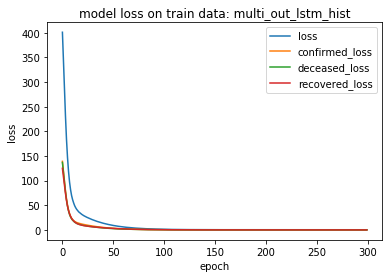

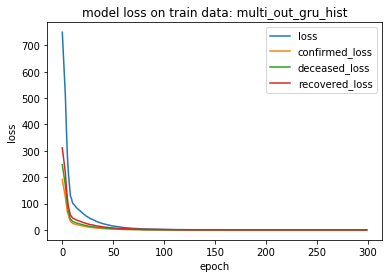

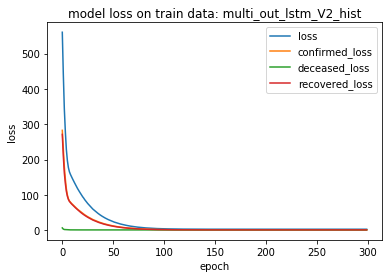

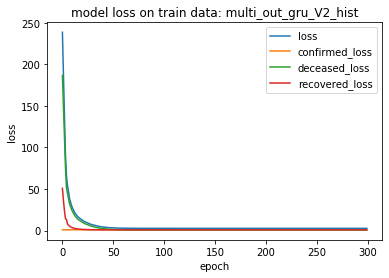

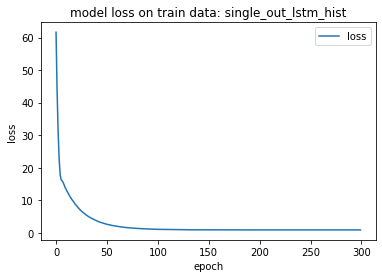

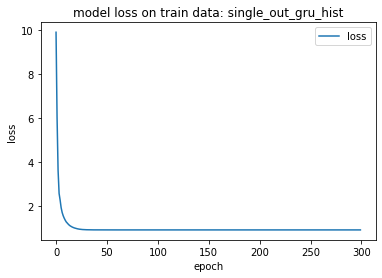

In [66]:
plot_training_history(multi_out_lstm_hist, "multi_out_lstm_hist")
plot_training_history(multi_out_gru_hist, "multi_out_gru_hist")
plot_training_history(multi_out_lstm_V2_hist, "multi_out_lstm_V2_hist")
plot_training_history(multi_out_gru_V2_hist, "multi_out_gru_V2_hist")
plot_training_history_single(single_out_lstm_hist, "single_out_lstm_hist")
plot_training_history_single(single_out_gru_hist, "single_out_gru_hist")

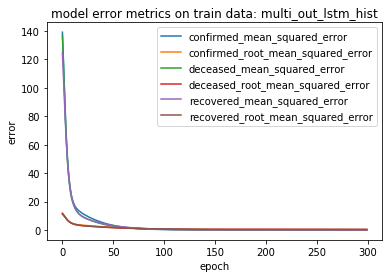

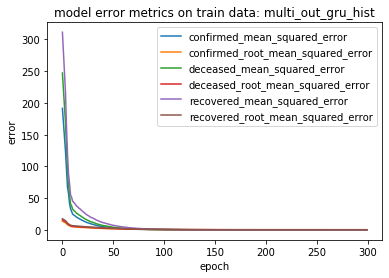

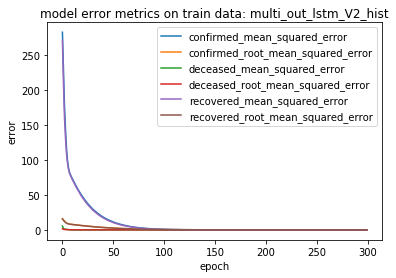

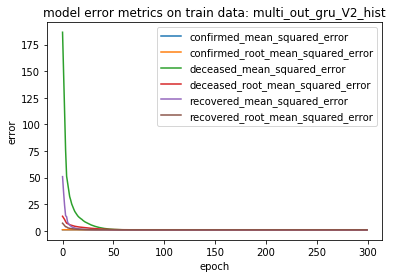

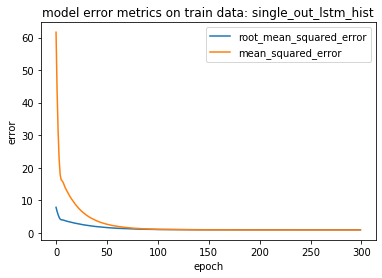

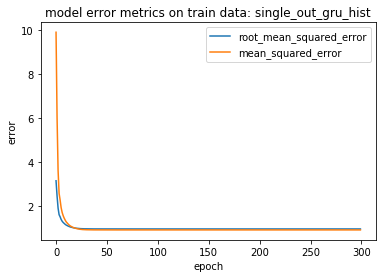

In [67]:
plot_training_metrics(multi_out_lstm_hist, "multi_out_lstm_hist")
plot_training_metrics(multi_out_gru_hist, "multi_out_gru_hist")
plot_training_metrics(multi_out_lstm_V2_hist, "multi_out_lstm_V2_hist")
plot_training_metrics(multi_out_gru_V2_hist, "multi_out_gru_V2_hist")
plot_training_metrics_single(single_out_lstm_hist, "single_out_lstm_hist")
plot_training_metrics_single(single_out_gru_hist, "single_out_gru_hist")

In [68]:
from pprint import pprint
print("multi_out_lstm_eval")
pprint(multi_out_lstm_eval)
print()
print("multi_out_gru_eval")
pprint(multi_out_gru_eval)
print()
print("multi_out_lstm_V2_eval")
pprint(multi_out_lstm_V2_eval)
print()
print("multi_out_gru_V2_eval")
pprint(multi_out_gru_V2_eval)
print()
print("single_out_lstm_eval")
pprint(single_out_lstm_eval)
print()
print("single_out_gru_eval")
pprint(single_out_gru_eval)

multi_out_lstm_eval
{'confirmed_loss': 0.09521888941526413,
 'confirmed_mean_squared_error': 0.09521888941526413,
 'confirmed_root_mean_squared_error': 0.3085756003856659,
 'deceased_loss': 0.18549387156963348,
 'deceased_mean_squared_error': 0.18549387156963348,
 'deceased_root_mean_squared_error': 0.4306900203227997,
 'loss': 0.442680686712265,
 'recovered_loss': 0.16196796298027039,
 'recovered_mean_squared_error': 0.16196796298027039,
 'recovered_root_mean_squared_error': 0.40245240926742554}

multi_out_gru_eval
{'confirmed_loss': 0.08362481743097305,
 'confirmed_mean_squared_error': 0.08362481743097305,
 'confirmed_root_mean_squared_error': 0.2891795337200165,
 'deceased_loss': 0.1696612685918808,
 'deceased_mean_squared_error': 0.1696612685918808,
 'deceased_root_mean_squared_error': 0.4118995666503906,
 'loss': 0.39914602041244507,
 'recovered_loss': 0.14585992693901062,
 'recovered_mean_squared_error': 0.14585992693901062,
 'recovered_root_mean_squared_error': 0.381916135549545